# Conjugate gradient

![](../../assets/images/cg_0.jpg "DallE Generation")

## Understanding the Algorithm

The conjugate gradient method is a significant technique in numerical optimization, particularly used for solving large systems of linear equations. It is especially effective for systems whose matrix is symmetric and positive definite. Here is an explanation of its fundamental principles:

### Basic Concept

The conjugate gradient method is an alternative to classical iterative methods like Gauss-Seidel or Jacobi methods. It seeks to minimize (or maximize) a quadratic function, which is often the form of optimization problems in data science and engineering.

### Quadratic Function

Consider a quadratic function of the form:

$$ f(x) = \frac{1}{2} x^T A x - b^T x + c $$

where $A$ is a symmetric and positive definite matrix, $b$ a vector, and $c$ a constant. The solution to the equation $Ax = b$ is the point where this function reaches its minimum.

### Gradient and Conjugate Direction

- **Gradient:** The gradient of $f(x)$ indicates the direction of the steepest ascent. To find a minimum, one moves in the opposite direction to the gradient.

- **Conjugation:** Directions are said to be conjugated with respect to $A$ if they satisfy a certain orthogonality condition. This property ensures that each movement toward the minimum is as efficient as possible, avoiding redundancies of standard gradient descent methods.

### Algorithm

1. **Initialization:**
   - Define the matrix $A$ of the linear system $Ax = b$ (coefficient matrix).
   - Define the vector $b$ (constant term vector).
   - Define an initial approximation $x_0$ (initial unknown vector).
   - Define a tolerance $\epsilon$ for convergence.
   - Define a maximum number of iterations $N_{\text{max}}$.

2. **Calculation of the initial residue:**
   - Calculate the initial residue $r_0 = b - Ax_0$.

3. **Initialization of variables:**
   - Define the initial search vector $p_0 = r_0$.
   - Define $k = 0$ (current iteration).

4. **Iterations:**
   - While $k < N_{\text{max}}$ and $||r_k|| > \epsilon$:
     - Calculate the product $Ap_k$.
     - Calculate the search step $\alpha_k = \frac{r_k^T r_k}{p_k^T A p_k}$.
     - Update the solution: $x_{k+1} = x_k + \alpha_k p_k$.
     - Update the residue: $r_{k+1} = r_k - \alpha_k A p_k$.
     - Calculate the conjugation coefficient $\beta_k = \frac{r_{k+1}^T r_{k+1}}{r_k^T r_k}$.
     - Update the search vector: $p_{k+1} = r_{k+1} + \beta_k p_k$.
     - Increment $k = k + 1$.

5. **End of the Algorithm:**
   - If $||r_k|| \leq \epsilon$, the algorithm has successfully converged.
   - Otherwise, the algorithm has reached the maximum number of iterations without achieving the desired tolerance.

6. **Result:**
   - The approximate solution $x_k$ is the solution to the system $Ax = b$ with accuracy determined by $\epsilon$.

This algorithm effectively solves linear systems by minimizing the quadratic error between the approximate and real solutions.

## Usage examples

1. **Solving Partial Differential Equations in Computational Science**: In computational science, the conjugate gradient method is widely utilized for solving partial differential equations. These equations frequently arise in numerous scientific and engineering applications, enabling researchers to efficiently simulate complex physical phenomena like fluid flow, heat transfer, and structural analysis.

2. **Unconstrained Optimization Problems and Energy Minimization**: This method is also applied in solving unconstrained optimization problems, including energy minimization tasks. Its flexibility and efficiency make it suitable for a range of optimization challenges.

3. **Solving Large and Sparse Systems of Linear Equations**: In conjunction with generalized and approximate polynomial preconditionings, the conjugate gradient method is effective for addressing large and sparse systems of linear equations. The use of approximate polynomial preconditioning has shown to enhance efficiency compared to generalized polynomials.

4. **Unconstrained Optimization with Modified Fletcher–Reeves Method**: A class of modified Fletcher–Reeves conjugate gradient methods, incorporating Armijo-type line search, is used for generating descent directions in solving unconstrained optimization problems. This demonstrates the method's adaptability and effectiveness in optimization scenarios.

5. **Computational Mechanics on Graphics Processing Units (GPUs)**: The method is employed in computing linear algebra operations and solving linear systems that emerge from the finite element discretization of computational mechanics problems, specifically optimized for execution on Graphics Processing Units (GPUs).

## Strengths

1. **Effective Convergence to Optimal Solution**: One of the primary strengths of the conjugate gradient method is its ability to effectively converge to the optimal solution by iteratively moving along conjugate directions in the solution space.

2. **Strong Convergence Properties with Modest Storage Requirements**: The conjugate gradient method is characterized by its robust convergence properties and relatively modest storage needs. This makes it particularly suitable for large-scale unconstrained optimization problems and applications.

3. **Theoretical Directness in Absence of Round-off Error**: Theoretically, the conjugate gradient method can be considered a direct method because, in the absence of round-off errors, it can produce the exact solution in a finite number of iterations. These iterations are typically not larger than the size of the matrix involved.

4. **Preconditioning for Improved Convergence**: When dealing with matrices that have a large condition number, preconditioning is commonly employed. This process involves replacing the original system with a modified one to ensure a smaller condition number, facilitating faster convergence.

5. **Efficient Initial Iteration and Fast Convergence**: In practical applications, the first stage of iterations is often the fastest, as the error is rapidly eliminated within the initial Krylov subspace. This leads to a fast approach to the required tolerance level in a relatively small number of iterations. Moreover, the use of preconditioning methods helps in ensuring this fast convergence.

6. **Optimization Using Line Search and Steepest Descent Methods**: The conjugate gradient method can be optimized further using line search and steepest descent methods. By making certain substitutions in the algorithm, it's possible to reduce storage requirements, making each iteration slightly less resource-intensive. However, even with these optimizations, the conjugate gradient method generally converges faster compared to other methods.

## Weaknesses

1. **Dependence on Good Preconditioning**: The efficiency of the CG method greatly depends on preconditioning. Preconditioning is a process that transforms the problem into a form more suitable for rapid convergence. However, finding an effective preconditioner can be challenging, and without a good one, the convergence rate of the CG method can be severely impacted, especially for ill-conditioned systems.

2. **Sensitivity to Round-off Errors**: The CG method is sensitive to round-off errors due to its iterative nature. In practice, this means that floating-point arithmetic can affect the accuracy of the solution. The accumulation of these errors over iterations can lead to a significant deviation from the exact solution, particularly in systems with a large number of variables or iterations.

3. **Inefficiency for Non-Sparse Systems**: While CG is highly effective for large, sparse systems (where most elements are zero), its performance degrades for dense systems. This is because the method exploits the sparsity of the matrix to reduce computational complexity. In dense matrices, this advantage is lost, making the CG less efficient compared to other methods.

4. **Convergence Issues for Non-Positive Definite Matrices**: The standard CG method is designed for positive definite matrices. When dealing with non-positive definite (or indefinite) matrices, the method may not converge. This limitation requires modifications or alternative methods for such matrices, limiting its applicability.

5. **Difficulty in Estimating Optimal Iteration Count**: Determining the optimal number of iterations for convergence can be challenging. Too few iterations might not yield an accurate solution, while too many increase computation time unnecessarily. This problem is exacerbated because the rate of convergence is influenced by the properties of the matrix, such as its condition number, which are not always easily assessed.

## Python demonstration

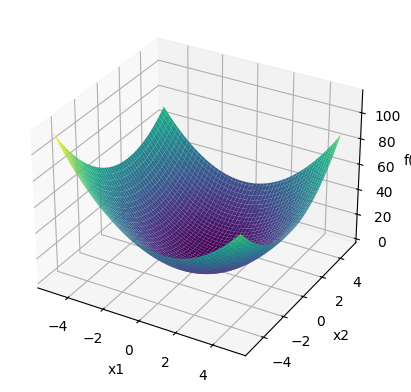

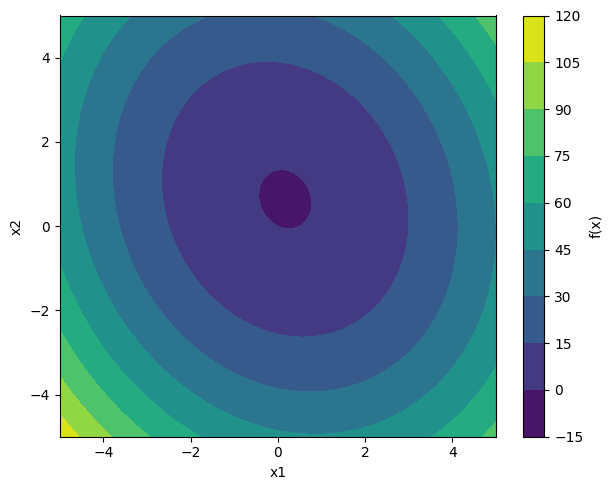

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Créez une grille de valeurs pour x1 et x2
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculez les valeurs correspondantes de f(x) pour chaque paire de (x1, x2)
f_x = 0.5 * (4 * X1**2 + X1 * X2 + 3 * X2**2) - (X1 + 2 * X2)

# Créez une figure et un axe 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, f_x, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

# Affichez le graphique en 3D
plt.show()

# Créez des graphiques de contours pour x1 et x2
plt.figure(figsize=(12, 5))
plt.subplot(121)
contour1 = plt.contourf(X1, X2, f_x, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour1, label='f(x)')

plt.tight_layout()
plt.show()


In [66]:
import numpy as np

def gradient_conjugue(A, b, x0, epsilon, max_iterations):
    x = x0
    r = b - np.dot(A, x)
    p = r
    k = 0
    
    while k < max_iterations and np.linalg.norm(r) > epsilon:
        Ap = np.dot(A, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        k += 1
    print(k)
    return x

# Matrice A et vecteur b du système
A = np.array([[2, -1], [-1, 4]])
b = np.array([2, 4])

# Approximation initiale de la solution
x0 = np.array([4, 3])

# Tolérance et nombre maximum d'itérations
epsilon = 1e-1
max_iterations = 10000

# Résolution du système avec l'approche 1
solution_approche_1 = gradient_conjugue(A, b, x0, epsilon, max_iterations)
print("Solution approche 1 :", solution_approche_1)


2
Solution approche 1 : [1.71428571 1.42857143]


In [62]:
import numpy as np
from scipy.optimize import minimize

# Définissez la fonction objectif à minimiser
def objective_function(x):
    # return 0.5 * (x[0]**2 + 10 * x[1]**2) - (x[0] + x[1])
    return x[0]**2 + 2 * x[1]**2 - 2 * x[0] * x[1] - 2 * x[0] - 4 * x[1]

# Approximation initiale de la solution
x0 = np.array([0, 0])

# Utilisez la fonction de minimisation de SciPy (méthode du gradient conjugué)
result = minimize(objective_function, x0, method='CG', tol=epsilon, options={'maxiter': max_iterations})

# Obtenez la solution de l'approche 2
solution_approche_2 = result.x
print("Solution approche 2 :", solution_approche_2)

Solution approche 2 : [4.03 3.01]


In [68]:
# Correction du script pour éviter l'erreur de type de données

def gradient_conjugue_corrected(A, b, tol=1e-10, max_iter=1000):
    x = np.zeros_like(b, dtype=np.float64)  # Initialisation de x à zéro avec type float64
    r = b - np.dot(A, x)  # Calcul du résidu initial
    p = r.copy()
    rsold = np.dot(r.T, r)

    for i in range(max_iter):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)
        x += alpha * p
        r -= alpha * Ap
        rsnew = np.dot(r.T, r)

        if np.sqrt(rsnew) < tol:
            break

        p = r + (rsnew / rsold) * p
        rsold = rsnew

    return x

# Redéfinir A et b avec le type approprié
A = np.array([[4, 1], [1, 3]], dtype=np.float64)
b = np.array([1, 2], dtype=np.float64)

# Résoudre Ax = b avec la fonction corrigée
x_corrected = gradient_conjugue_corrected(A, b)
x_corrected


array([0.09090909, 0.63636364])

In [71]:
print(4 * x_corrected[0] + x_corrected[1])
print(x_corrected[0] + 3 * x_corrected[1])

1.0
2.0


In [72]:
# Définir un système plus grand
n = 5  # Taille de la matrice
np.random.seed(0)  # Pour des résultats reproductibles

# Création d'une matrice A symétrique et définie positive
A_large = np.random.rand(n, n)
A_large = np.dot(A_large, A_large.T)  # A*A.T pour assurer la symétrie et la définition positive

# Création d'un vecteur b aléatoire
b_large = np.random.rand(n)

# Résoudre Ax = b avec la fonction de gradient conjugué
x_large = gradient_conjugue_corrected(A_large, b_large)

# Vérification de la solution
Ax_large = np.dot(A_large, x_large)
x_reference_large = np.linalg.solve(A_large, b_large)

x_large, Ax_large, x_reference_large, np.allclose(Ax_large, b_large), np.allclose(x_large, x_reference_large)



(array([  77.00029406, -121.39859873,  162.9267214 ,   15.69743843,
        -103.87092299]),
 array([0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194]),
 array([  77.00029406, -121.39859873,  162.9267214 ,   15.69743843,
        -103.87092299]),
 True,
 True)

In [73]:
import numpy as np
from scipy.optimize import minimize

# Fonction quadratique pour la masse du ressort
def masse_ressort(x):
    d, D, n = x
    return d**2 + D**2 + n**2

# Point de départ (valeurs initiales pour d, D, et n)
x0 = np.array([1, 1, 1])

# Minimisation en utilisant la méthode du gradient conjugué
result = minimize(masse_ressort, x0, method='CG')

print("Solution optimale :", result.x)
print("Valeur minimale de la fonction :", result.fun)


Solution optimale : [-5.24239117e-08 -5.24239117e-08 -5.24239117e-08]
Valeur minimale de la fonction : 8.244799539999584e-15


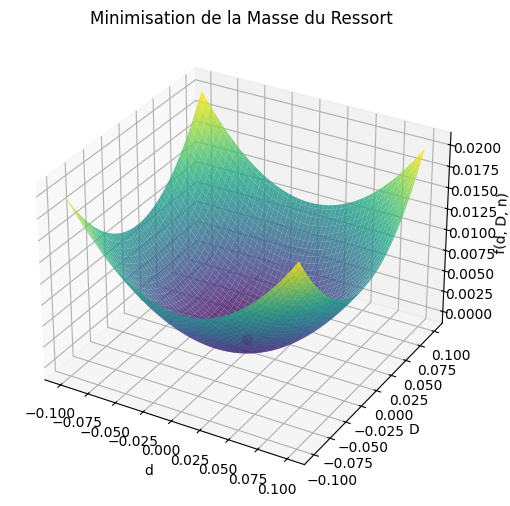

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création d'une grille autour du minimum
d_range = np.linspace(-0.1, 0.1, 100)
D_range = np.linspace(-0.1, 0.1, 100)
d_grid, D_grid = np.meshgrid(d_range, D_range)

# Calcul des valeurs de la fonction avec n fixé au minimum
n_min = result.x[2]
f_values = masse_ressort([d_grid, D_grid, n_min])

# Création du graphique 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface
ax.plot_surface(d_grid, D_grid, f_values, cmap='viridis', alpha=0.8)

# Mettre en évidence le point minimum
ax.scatter(*result.x[:2], result.fun, color='r', s=50)

ax.set_xlabel('d')
ax.set_ylabel('D')
ax.set_zlabel('f(d, D, n)')
ax.set_title('Minimisation de la Masse du Ressort')

plt.show()


End of demonstration

---

## Practical optimization tools

1. [**CGDs (Python):**](https://pypi.org/project/CGDs/) CGDs is a Python package that implements optimization algorithms, including three variants of the Conjugate Gradient Descent (CGD) in PyTorch. It supports Hessian vector product and conjugate gradient, making it suitable for competitive optimization problems such as generative adversarial networks (GANs). CGDs also features distributed training capabilities.

2. [**SciPy (Python):**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) SciPy, a well-known library in Python, offers a conjugate gradient solver under its `sparse.linalg` module. It is used to solve Ax = b using Conjugate Gradient iteration and supports both sparse matrix and ndarray formats. This tool is particularly effective for problems where the matrix A is hermitian and positive definite.

3. [**Apache Commons Math (Java):**](https://commons.apache.org/proper/commons-math/javadocs/api-3.6.1/org/apache/commons/math3/optimization/general/NonLinearConjugateGradientOptimizer.html) For Java, the NonLinearConjugateGradientOptimizer in the Apache Commons Math library is a notable option. It supports both Fletcher-Reeves and Polak-Ribière update formulas for conjugate search directions and offers optional preconditioning.

4. [**GitHub Projects (Various Languages):**](https://github.com/topics/conjugate-gradient?o=asc&s=stars) A variety of projects on GitHub implement the conjugate gradient algorithm in different languages. Notable examples include a distributed implementation using Apache Spark in Scala, an implementation in Python focusing on optimization algorithms, parallel preconditioned methods in C++, an implementation using SYCL and OpenMP in C++, and a Python wrapper for CG_DESCENT in C.

## Sources
| Sources |
|---------|
| [Conjugate gradient method - Wikipedia](https://en.wikipedia.org/wiki/Conjugate_gradient_method) |
| [What is the conjugate gradient method? - collimator.ai](https://www.collimator.ai/reference-guides/what-is-the-conjugate-gradient-method) |
| [Practical Use of Polynomial Preconditionings for the Conjugate Gradient Method - Semantic Scholar](https://www.semanticscholar.org/paper/Practical-Use-of-Polynomial-Preconditionings-for-Saad/582ceeb434593dc20269751ad0db85f4d272770c) |
| [Conjugate Gradient Methods - Spinger Link](https://link.springer.com/chapter/10.1007/978-3-031-08720-2_5) |
| [Conjugate gradient methods - Cornell university](https://optimization.cbe.cornell.edu/index.php?title=Conjugate_gradient_methods) |